In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ddd import Tag

from loader import load_data

In [4]:
data = load_data()

df = pd.DataFrame(data=[[tag.WochenID, tag.gesamtbewertung, tag.bolwertung, tag.Person, tag.wertung_distance,] for tag in data], columns=["WochenID", "Gesamtbewertung", "Bolwertung", "Person", "Distance",])

In [5]:
def plot_ddd_vs_dpd(data, axis_min=None, axis_max=40, major_ticks_step=5, minor_ticks_step=1):
    last_week = data["WochenID"].max()
    #pre_last_week = last_week - 1

    if axis_min is None:
        axis_min = 10
    
    colors = ['0.4'  for _ in range(len(df)-6)] + ['r' for _ in range(5)]

    g = sns.scatterplot(data=df, x="Gesamtbewertung", y="Bolwertung", hue="WochenID", palette=sns.color_palette("husl", last_week))

    # title
    g.set_title("Wertung Kandidaten vs Bols")


    # axis
    g.set_xlim(axis_min, axis_max)
    g.set_ylim(axis_min, axis_max)
    g.set_aspect('equal', adjustable="box")

    g.set_xlabel("Kandidaten")
    g.set_ylabel("Bols")

    # grid
    major_ticks = np.arange(axis_min, axis_max+1, major_ticks_step)
    minor_ticks = np.arange(axis_min, axis_max+1, minor_ticks_step)
    g.set_xticks(major_ticks)
    g.set_xticks(minor_ticks, minor=True)
    g.set_yticks(major_ticks)
    g.set_yticks(minor_ticks, minor=True)
    g.grid(which="minor", alpha=.3)
    g.grid(which="major", alpha=.5)

    # diagonal line
    linespace = np.linspace(axis_min, axis_max)
    sns.lineplot(x=linespace, y=linespace, color="grey", alpha=.5)


    # legend
    g.legend(title="Woche")


    # highlights
    for index, row in df.iterrows():

        # perfektes dinner
        if row["Gesamtbewertung"] >= 35 and row["Bolwertung"] >= 35:
            g.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=8, color="g")

        # katastrophen dinner
        if row["Gesamtbewertung"] <= 15 or row["Bolwertung"] <= 15:
            g.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=8, color="r")


        # high difference in rating
        #elif row["Distance"] >= 10:
        #    ax.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7, color="red")

        # current week
        elif row["WochenID"] == last_week: #or row["WochenID"] == pre_last_week:
            g.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=8)

    #g.grid(False)
    #person = df[df["Person"]=="Lukas"]
    #erkl = f"Punkte von den Kandidaten: {person["Gesamtbewertung"].item()}\n Punkte von den Bols: {person["Bolwertung"].item()}"
    #g.text(30, 15, erkl)

    return g


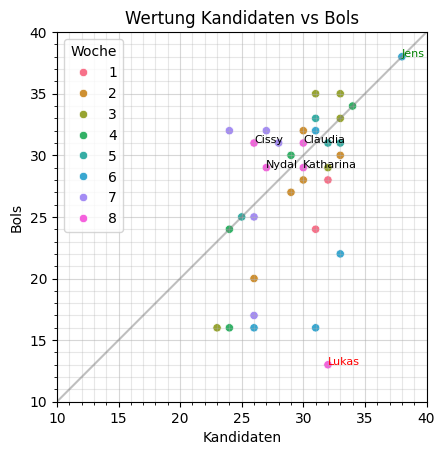

In [6]:
plot = plot_ddd_vs_dpd(df, axis_min=None)

plot.get_figure().savefig("out.png", dpi=200)